In [0]:
from google.colab import files


In [2]:
files.upload()

Saving submission_format.csv to submission_format.csv
Saving test_values.csv to test_values.csv
Saving train_labels.csv to train_labels.csv
Saving train_values.csv to train_values.csv


{'submission_format.csv': b'patient_id,heart_disease_present\nolalu7,0.5\nz9n6mx,0.5\n5k4413,0.5\nmrg7q5,0.5\nuki4do,0.5\nkev1sk,0.5\n9n6let,0.5\njxmtyg,0.5\n51s2ff,0.5\nwi9mcs,0.5\n741h4l,0.5\n1ef64a,0.5\nwa2ix6,0.5\n8167zl,0.5\nn6nldr,0.5\nph85fp,0.5\njfan5p,0.5\n7c4iz1,0.5\nukigml,0.5\nflwvnq,0.5\n5i4fw2,0.5\ndu1pqf,0.5\nvs68qz,0.5\npfyez0,0.5\nazvkw2,0.5\ncird1i,0.5\n3bg32t,0.5\nxzd050,0.5\neyi8et,0.5\nce4x2h,0.5\nsm91nr,0.5\n2il8hh,0.5\nyq9cqg,0.5\n520v5j,0.5\nammgu2,0.5\njix8hj,0.5\nlj5zrq,0.5\n16ceba,0.5\n93w44s,0.5\nbso17z,0.5\nj2w2dc,0.5\n74vwwl,0.5\n0z3fob,0.5\nmr7zyz,0.5\npp5n63,0.5\nj0hix1,0.5\nrn209i,0.5\nnfit8e,0.5\nnb73sy,0.5\ni79t3w,0.5\n9nv2d9,0.5\n2xbeja,0.5\nlwg3wq,0.5\nlrvqwb,0.5\nc6mepo,0.5\n6ued22,0.5\n112e9h,0.5\n8jc7h2,0.5\nunykmj,0.5\n4yeztb,0.5\ntgpy9u,0.5\npf5wp6,0.5\ncj8vj2,0.5\n9w6d9j,0.5\n3l89wd,0.5\n83a6x1,0.5\noua0gr,0.5\nj0hl96,0.5\ndlkzyg,0.5\nr0w4a8,0.5\n46dlca,0.5\n9fkefu,0.5\n6uk6kl,0.5\nc7olxr,0.5\niiyx0q,0.5\n25vetx,0.5\n073vc5,0.5\n18abn0,0.5\nv5

In [188]:
!ls

sample_data	submission_format.csv  train_labels.csv
submission.csv	test_values.csv        train_values.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
X = pd.read_csv('./train_values.csv')

In [191]:
X.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [192]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [193]:
y = pd.read_csv('./train_labels.csv')
y.head(5)

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [194]:
X.describe(include='all')

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180,180.000000,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
unique,180,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,m2a4i9,NaN,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.550000,NaN,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,NaN,0.618838,NaN,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,NaN,1.000000,NaN,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,NaN,1.000000,NaN,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,NaN,1.000000,NaN,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,NaN,2.000000,NaN,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000


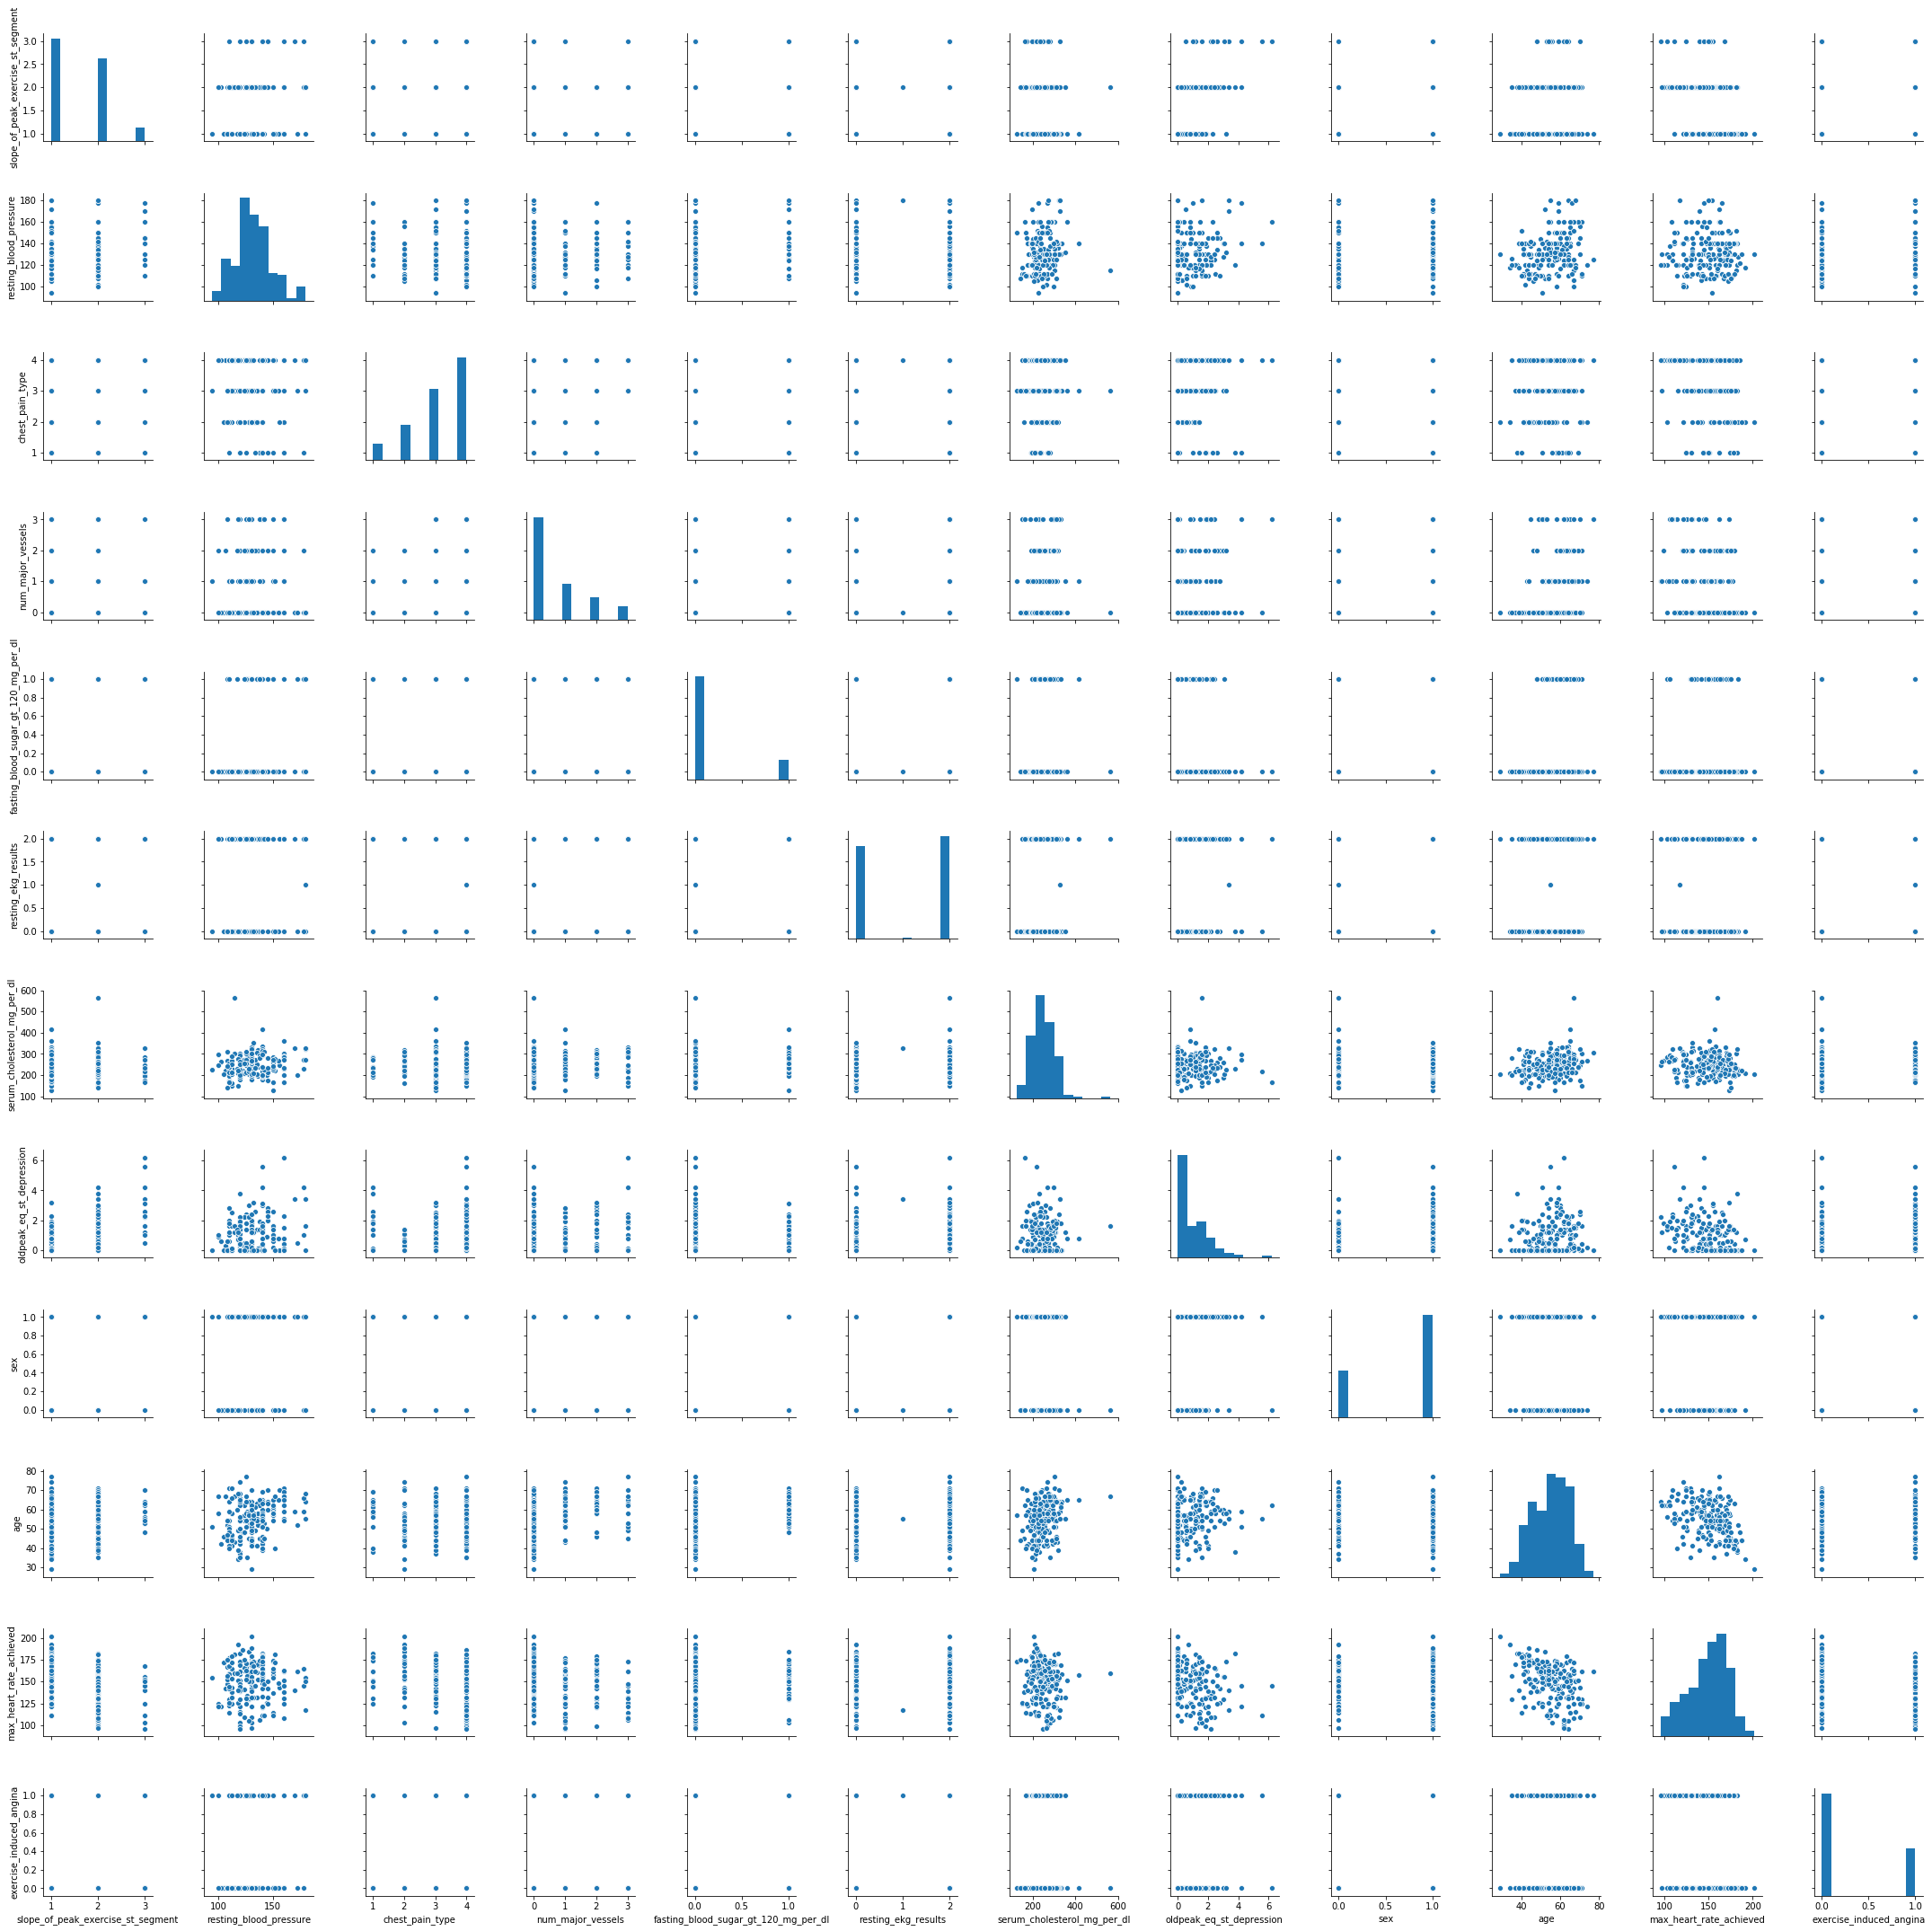

In [195]:
sns.pairplot(X)

In [0]:
train = pd.merge(X, y, left_on='patient_id', right_on='patient_id', how='inner')

In [197]:
train.apply(lambda x: sum(x.isna()/len(train)))

patient_id                              0.0
slope_of_peak_exercise_st_segment       0.0
thal                                    0.0
resting_blood_pressure                  0.0
chest_pain_type                         0.0
num_major_vessels                       0.0
fasting_blood_sugar_gt_120_mg_per_dl    0.0
resting_ekg_results                     0.0
serum_cholesterol_mg_per_dl             0.0
oldpeak_eq_st_depression                0.0
sex                                     0.0
age                                     0.0
max_heart_rate_achieved                 0.0
exercise_induced_angina                 0.0
heart_disease_present                   0.0
dtype: float64

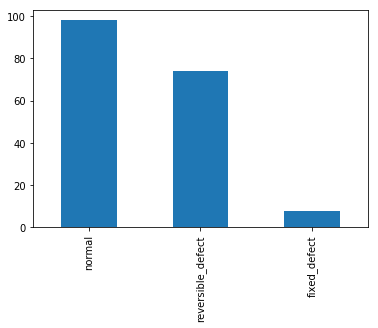

In [198]:
train['thal'].value_counts().plot.bar()

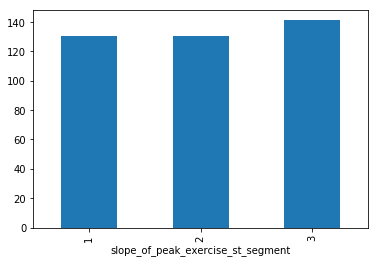

In [199]:
train.groupby("slope_of_peak_exercise_st_segment")['resting_blood_pressure'].mean().plot(kind='bar')

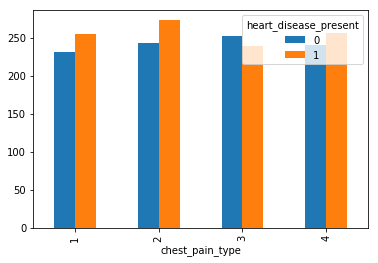

In [200]:
import numpy as np
pd.pivot_table(train, index='chest_pain_type', columns= 'heart_disease_present', values= "serum_cholesterol_mg_per_dl", aggfunc=np.mean).plot(kind= 'bar')

In [0]:
train = train.drop('patient_id', axis=1)
train = pd.get_dummies(train, columns=train.select_dtypes('object').columns)

In [202]:
train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


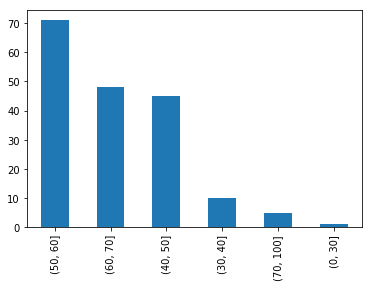

In [203]:
bins = [0, 30, 40, 50, 60, 70, 100]
train['age_group'] = pd.cut(train['age'], bins)
train['age_group'].value_counts().plot(kind='bar')

In [0]:
y = train.loc[:,'heart_disease_present']
X = train.drop('heart_disease_present', axis=1)
X = X.drop('age_group', axis=1)

In [205]:
y.head(5)

0    0
1    0
2    1
3    1
4    0
Name: heart_disease_present, dtype: int64

In [206]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
thal_fixed_defect                       180 non-null uint8
thal_normal                             180 non-null uint8
thal_reversible_defect                  180 non-null uint8
dtypes: 

In [207]:
X['oldpeak_eq_st_depression']=X['oldpeak_eq_st_depression'].astype('int')
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.89124111, -0.19519463, -1.23477477, ..., -0.21566555,
         0.91473203, -0.83553169],
       [ 0.72919727, -1.25631978, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [-0.89124111, -0.37204882,  0.90233541, ..., -0.21566555,
         0.91473203, -0.83553169],
       ...,
       [ 0.72919727, -0.37204882, -0.16621968, ..., -0.21566555,
        -1.09321633,  1.19684269],
       [-0.89124111, -0.43100022, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169],
       [-0.89124111,  1.69125009, -0.16621968, ..., -0.21566555,
         0.91473203, -0.83553169]])

In [0]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
from keras import Sequential
from keras.layers import Dense


In [211]:
len(X_train[0])

15

In [0]:
classifier = Sequential()

classifier.add(Dense(15,activation = 'relu', kernel_initializer = 'random_normal', input_dim=15))

classifier.add(Dense(8,activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(4,activation = 'relu', kernel_initializer = 'random_normal'))
classifier.add(Dense(4,activation = 'relu', kernel_initializer = 'random_normal'))

classifier.add(Dense(1,activation = 'sigmoid', kernel_initializer = 'random_normal'))

In [0]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [251]:
classifier.fit(X_train,y_train, batch_size=10, epochs=30, verbose=2)


Epoch 1/30
 - 0s - loss: 0.2651 - acc: 0.9375
Epoch 2/30
 - 0s - loss: 0.2585 - acc: 0.9444
Epoch 3/30
 - 0s - loss: 0.2545 - acc: 0.9444
Epoch 4/30
 - 0s - loss: 0.2494 - acc: 0.9444
Epoch 5/30
 - 0s - loss: 0.2450 - acc: 0.9444
Epoch 6/30
 - 0s - loss: 0.2413 - acc: 0.9444
Epoch 7/30
 - 0s - loss: 0.2371 - acc: 0.9444
Epoch 8/30
 - 0s - loss: 0.2352 - acc: 0.9444
Epoch 9/30
 - 0s - loss: 0.2319 - acc: 0.9444
Epoch 10/30
 - 0s - loss: 0.2293 - acc: 0.9375
Epoch 11/30
 - 0s - loss: 0.2250 - acc: 0.9444
Epoch 12/30
 - 0s - loss: 0.2226 - acc: 0.9444
Epoch 13/30
 - 0s - loss: 0.2220 - acc: 0.9444
Epoch 14/30
 - 0s - loss: 0.2171 - acc: 0.9444
Epoch 15/30
 - 0s - loss: 0.2173 - acc: 0.9375
Epoch 16/30
 - 0s - loss: 0.2133 - acc: 0.9444
Epoch 17/30
 - 0s - loss: 0.2109 - acc: 0.9375
Epoch 18/30
 - 0s - loss: 0.2069 - acc: 0.9514
Epoch 19/30
 - 0s - loss: 0.2054 - acc: 0.9514
Epoch 20/30
 - 0s - loss: 0.2031 - acc: 0.9514
Epoch 21/30
 - 0s - loss: 0.2013 - acc: 0.9514
Epoch 22/30
 - 0s - lo

In [252]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

144/144 [==============================] - 0s 2ms/step


[0.18645466532972124, 0.9513888888888888]

In [0]:
y_pred=classifier.predict(X_test)
for i in y_pred:
  if i[0]>0.5:
    i[0]=1
  else:
    i[0]=0

In [254]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[12  3]
 [ 5 16]]


In [255]:
y_train.head()

46     0
175    1
51     0
60     0
104    0
Name: heart_disease_present, dtype: int64

In [0]:
test = pd.read_csv('./test_values.csv')
submit = pd.read_csv('./submission_format.csv')

In [226]:
test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [227]:
submit.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [228]:
test.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.655556,131.411111,3.211111,0.622222,0.122222,0.966667,250.555556,1.130000,0.655556,53.677778,150.066667,0.355556
std,0.602637,19.552806,0.977206,0.894148,0.329377,0.999438,49.835936,1.193847,0.477849,8.641197,25.351817,0.481363
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,166.000000,0.000000,0.000000,34.000000,71.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,212.250000,0.000000,0.000000,46.250000,136.500000,0.000000
50%,2.000000,130.000000,4.000000,0.000000,0.000000,0.000000,243.500000,0.800000,1.000000,54.000000,156.500000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,274.750000,1.875000,1.000000,60.000000,164.750000,1.000000
max,3.000000,200.000000,4.000000,3.000000,1.000000,2.000000,409.000000,4.000000,1.000000,76.000000,195.000000,1.000000


In [229]:
submit.describe()

,heart_disease_present
count,90.0
mean,0.5
std,0.0
min,0.5
25%,0.5
50%,0.5
75%,0.5
max,0.5


In [0]:
test = pd.merge(test, submit, left_on='patient_id', right_on='patient_id', how='inner')

In [231]:
test.apply(lambda x: sum(x.isna()/len(test)))

patient_id                              0.0
slope_of_peak_exercise_st_segment       0.0
thal                                    0.0
resting_blood_pressure                  0.0
chest_pain_type                         0.0
num_major_vessels                       0.0
fasting_blood_sugar_gt_120_mg_per_dl    0.0
resting_ekg_results                     0.0
serum_cholesterol_mg_per_dl             0.0
oldpeak_eq_st_depression                0.0
sex                                     0.0
age                                     0.0
max_heart_rate_achieved                 0.0
exercise_induced_angina                 0.0
heart_disease_present                   0.0
dtype: float64

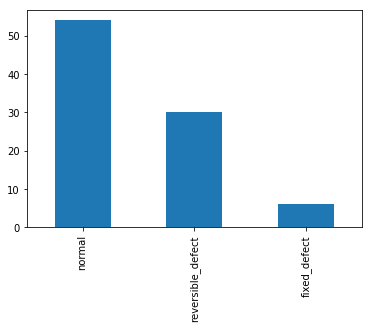

In [232]:
test['thal'].value_counts().plot.bar()

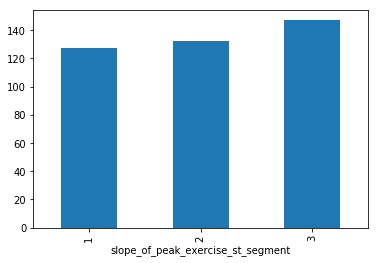

In [233]:
test.groupby("slope_of_peak_exercise_st_segment")['resting_blood_pressure'].mean().plot(kind='bar')

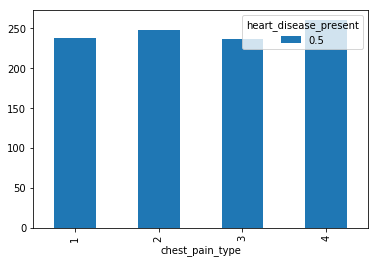

In [234]:
pd.pivot_table(test, index='chest_pain_type', columns= 'heart_disease_present', values= "serum_cholesterol_mg_per_dl", aggfunc=np.mean).plot(kind= 'bar')

In [0]:
test = test.drop('patient_id', axis=1)
test = pd.get_dummies(test, columns=test.select_dtypes('object').columns)

In [236]:
test.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,2,170,1,0,0,2,288,0.2,1,59,159,0,0.5,0,0,1
1,1,138,4,0,0,0,183,1.4,0,35,182,0,0.5,0,1,0
2,2,120,4,0,0,2,177,2.5,1,43,120,1,0.5,0,0,1
3,1,102,3,1,0,0,318,0.0,0,60,160,0,0.5,0,1,0
4,2,138,4,1,0,2,166,3.6,1,61,125,1,0.5,0,1,0


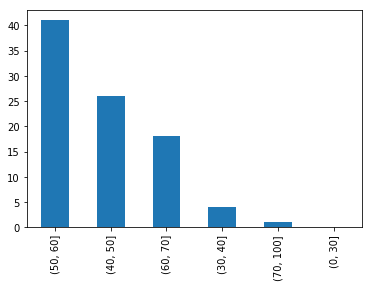

In [237]:
bins = [0, 30, 40, 50, 60, 70, 100]
test['age_group'] = pd.cut(test['age'], bins)
test['age_group'].value_counts().plot(kind='bar')

In [0]:
y1 = test.loc[:,'heart_disease_present']
X1 = test.drop('heart_disease_present', axis=1)
X1 = X1.drop('age_group', axis=1)

In [239]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       90 non-null int64
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
thal_fixed_defect                       90 non-null uint8
thal_normal                             90 non-null uint8
thal_reversible_defect                  90 non-null uint8
dtypes: float64(1), int64

In [240]:
X1['oldpeak_eq_st_depression']=X1['oldpeak_eq_st_depression'].astype('int')
X1 = sc.fit_transform(X1)
X1

array([[ 0.57476436,  1.98462943, -2.27536328, ..., -0.26726124,
        -1.22474487,  1.41421356],
       [-1.09390637,  0.33886705,  0.81181303, ..., -0.26726124,
         0.81649658, -0.70710678],
       [ 0.57476436, -0.58687429,  0.81181303, ..., -0.26726124,
        -1.22474487,  1.41421356],
       ...,
       [-1.09390637,  0.85316779, -2.27536328, ..., -0.26726124,
         0.81649658, -0.70710678],
       [ 0.57476436,  0.33886705,  0.81181303, ..., -0.26726124,
         0.81649658, -0.70710678],
       [-1.09390637,  0.95602794,  0.81181303, ..., -0.26726124,
         0.81649658, -0.70710678]])

In [241]:
len(X1)

90

In [0]:
y_predictions=classifier.predict(X1)


In [0]:
q=[]
for i in y_predictions:
  if i[0]>0.5:
    q.append(float(1))
  else:
    q.append(float(0))

In [0]:
my_submission = pd.DataFrame({'patient_id': submit.patient_id, 'heart_disease_present': q})
# you could use any filename. We choose submission here
my_submission.to_csv('./submission.csv', index=False)


In [0]:
files.download('./submission.csv')